The curse of dimensionality refers to the problems that arise when working with high-dimensional data, such as increased sparsity, overfitting, and 
ineffective distance metrics. As dimensions increase, models require more data and computation, and performance often degrades.

Solution: Use feature selection, Or Feature Extrantion .

feature selection is used at the end so will study it at the end

feature extraction

    PCA (Principle Component Analysis (PCA))
    
        PCA convert a higher dimensional data to a lower dimensional data with maintaing essence of data

        benefits of PCA
        
            faster execution of code

            better visualisation


# PCA

## Covariance

<img src="../../images/Covariance.jpg" alt="covariance matrix">
<img src="https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/covariance-formula-1-1624005488.png" alt="covariance formula">


Steps of PCA

<a href="https://www.geeksforgeeks.org/principal-component-analysis-pca/" target="_blank">
  click here for steps of PCA
</a>

In [2]:
# creating a df

import numpy as np
import pandas as pd

np.random.seed(23) #You're telling NumPy to initialize the random number generator with the seed value 23.

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target'] = 0

df = pd.concat([df1,df],ignore_index=True)

df = df.sample(40)
df.sample(5)

,feature1,feature2,feature3,target
25,-1.009942,0.441736,1.128877,1
38,-0.331617,-1.632386,0.619114,1
24,0.322272,0.060343,-1.043450,1
15,1.233898,0.052778,-0.261576,0
13,2.823378,-0.332863,2.637391,0


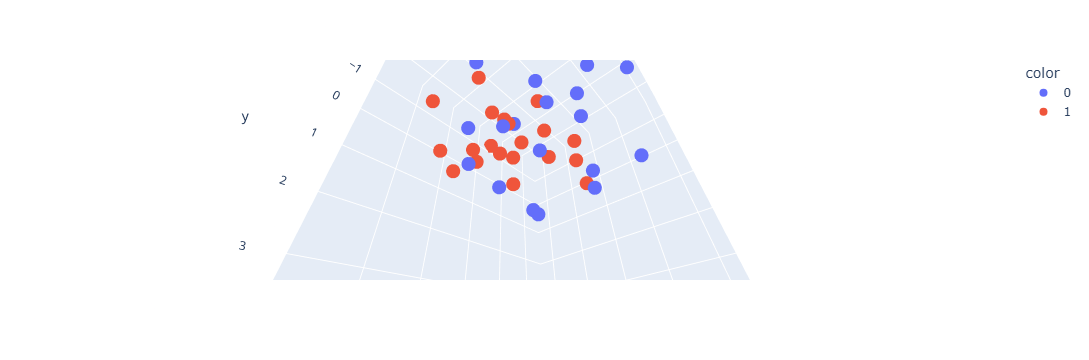

In [4]:
# visualising data in 3d
 
import plotly.express as px

fig = px.scatter_3d(
    x=df["feature1"],
    y=df["feature2"],
    z=df["feature3"],
    color=df["target"].astype(str)
)

fig.show()

In [6]:
# step 1 applyin standard scaler

from sklearn.preprocessing import StandardScaler

std=StandardScaler()
df.iloc[:,:3]=std.fit_transform(df.iloc[:,:3])

In [9]:
# step 2 clculating vovariance mat

cov=df.iloc[:,:3].cov()
cov

,feature1,feature2,feature3
feature1,1.025641,0.204781,0.080118
feature2,0.204781,1.025641,0.198389
feature3,0.080118,0.198389,1.025641


In [10]:
# step 3 calulating eigen values and eigne vectors

eigen_values,eigen_vectors=np.linalg.eig(cov)

In [11]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [12]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

In [13]:
# we are converting 3 columns to columns so fetching two greatest eigen vevtors als known as Principal component
pc=eigen_vectors[0:2]

In [17]:
transformed_df=np.dot(df.iloc[:,:3],pc.T)
new_df=pd.DataFrame(transformed_df,columns=["PC1","PC2"])
new_df["Target"]=df["target"].values
new_df.head(5)

,PC1,PC2,Target
0,-3.367715,-0.254627,0
1,-0.271876,0.498222,1
2,1.056919,-0.212737,0
3,-0.470834,-1.373121,0
4,-0.433734,1.153326,0
